In [1]:
library("here")
library(devtools)
library(Seurat)
library(harmony)
library(RcppML)
library(reshape2)
library(tidyverse)
load_all('/home/jpm73279/Socrates')
data_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/"

set.seed(12345)



here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Attaching SeuratObject

Attaching sp

Loading required package: Rcpp

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2.9000 ──
✔ ggplot2   3.3.6      ✔ dplyr     1.0.10
✔ tibble    3.1.8      ✔ stringr   1.4.1 
✔ tidyr     1.2.1      ✔ forcats   0.5.2 
✔ readr     2.1.2      ✔ lubridate 1.8.0 
✔ purrr     0.3.4      
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Loading Socrates
Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand,

In [2]:

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

In [3]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"

sb_leaf_rep_1 <- paste0(analysis_path, "Sorghum_leaf.sciATAC.merged.unique.tn5.sorted.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Sbicolorv5.1.primaryTrs.gff3")
chr <- paste0(reference_genome_path,"Sorghum_bicolor_var_BTx623.chrom.size")
pre <- "Sb.Leaf_merged_reps"



#Load Object
Sb.subcluster <- loadBEDandGenomeData(sb_leaf_rep_1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC.merged.unique.tn5.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.primaryTrs.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [4]:

marker_list_sb_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/markers/Sb.leaf_markers_from_zm.markers.txt"
marker_list_sb <- read_delim(marker_list_sb_file, delim='\t', 
                                       col_names = TRUE)

Rows: 151 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): chr, geneID, name, type, tissue
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
loaded_socrates_data <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.annotation_V3t.LC_results.rds")

In [6]:

sb.loaded_socrates_data.epidermal <- loaded_socrates_data
cleaned_cluster_meta <- sb.loaded_socrates_data.epidermal$Clusters  %>% 
        group_by(LouvainClusters)  %>% 
        mutate(Louvain_cluster_safe = str_c("LouvainC_", LouvainClusters))
    
sb.loaded_socrates_data.epidermal$Clusters <- cleaned_cluster_meta

In [7]:
sb.final.v3 <-  read_delim("/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/Sb_leaf.V3_final.txt",
          delim='\t', col_names = TRUE)

sb.loaded_socrates_data.epidermal$Clusters <- sb.final.v3

Rows: 14947 Columns: 25
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (13): cellID, sampleID, d.type, cell_annotation_glmnet, cell_annotation_...
dbl (12): total, tss, acrs, ptmt, nSites, log10nSites, umap1, umap2, doublet...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## SubClustering Epidermal Lineages:
"LouvainC_2", "LouvainC_12", "LouvainC_20", 
"LouvainC_4", "LouvainC_6", "LouvainC_18",
"LouvainC_15", "LouvainC_1"

In [8]:
unique(sb.loaded_socrates_data.epidermal$Clusters$V3_annotation_n)

[1] "protoderm_ncell_1814"         "epidermal_ncell_3543"        
 [3] "mesophyll_ncell_3425"         "vascular_parenchyma_ncell_69"
 [5] "companion_cell_ncell_460"     "sieve_element_ncell_962"     
 [7] "unknown_ncell_1602"           "subsidary_cell_ncell_220"    
 [9] "xylem_ncell_228"              "ground_meristem_ncell_854"   
[11] "bundle_sheath_ncell_1770"

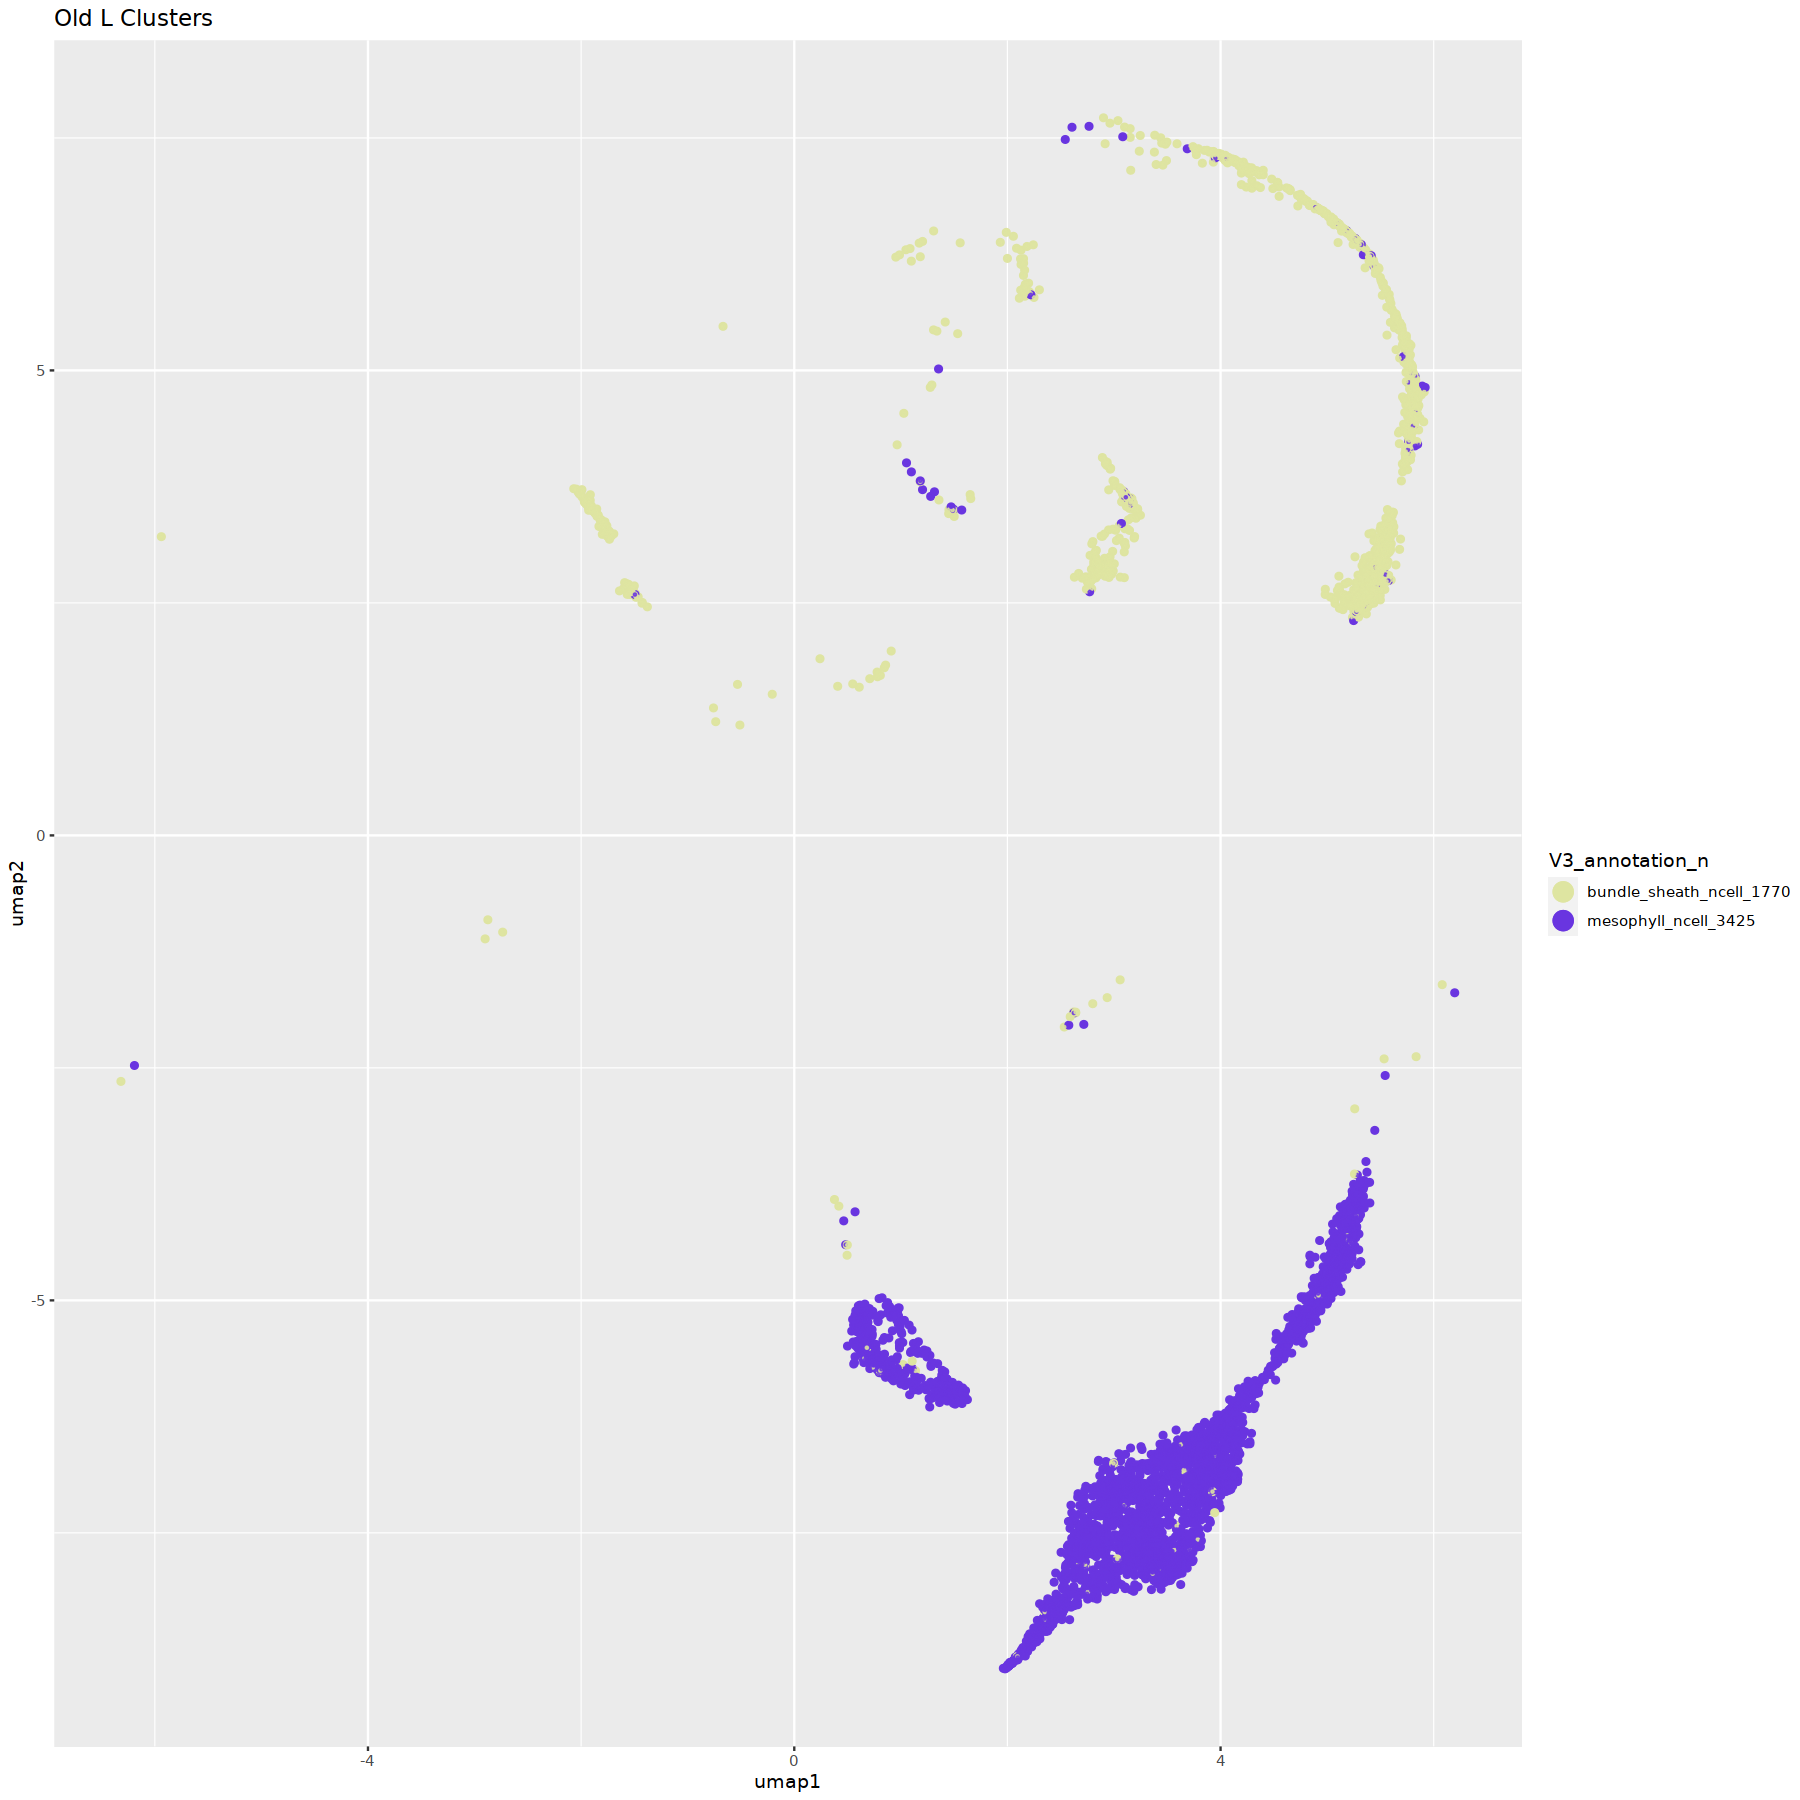

In [9]:
library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


Sb.subcluster.epidermal <- Sb.subcluster

clusters <- c("mesophyll_ncell_3425", "bundle_sheath_ncell_1770")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.loaded_socrates_data.epidermal$Clusters  %>% 
    filter(V3_annotation_n %in% clusters) %>% 
    group_by(V3_annotation_n) %>% 
    ggplot(., aes(umap1, umap2, color = V3_annotation_n)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.loaded_socrates_data.epidermal$Clusters %>% 
    filter(V3_annotation_n %in% clusters)

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Sb.subcluster.epidermal$meta <- meta_df
Sb.subcluster.epidermal$meta.v3 <- meta_df

In [10]:
Sb.subcluster.epidermal <- generateMatrix(Sb.subcluster.epidermal, 
                                              filtered=FALSE,
                                              peaks = FALSE,
                                              verbose=TRUE)

In [11]:
Sb.subcluster.epidermal <- convertSparseData(Sb.subcluster.epidermal, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [12]:
# clean sparse counts matrix ---------------------------------------------
Sb.subcluster.epidermal.clean <- cleanData(Sb.subcluster.epidermal, 
                     min.t=0.005,  # minimum feature frequency across cells
                     #max.t=0.1, # maximum feature frequency across cells
                     verbose=T)


   * Input: cells = 5195 | peaks = 694096

   * Filtered: cells = 5195 | peaks = 73022



In [13]:
Sb.subcluster.epidermal.clean$meta  %>% 
#    group_by(Louvain_cluster_safe)  %>% 
    summarise(n())
    

n()
<int>
5195


In [14]:
# normalize with TFIDF ---------------------------------------------------
Sb.subcluster.epidermal.tfidf <- tfidf(Sb.subcluster.epidermal.clean)

In [15]:
# project with NMF -------------------------------------------------------
Sb.subcluster.epidermal.tfidf <- reduceDims(Sb.subcluster.epidermal.tfidf,
                      method="SVD", 
                      n.pcs=50, 
                      svd_slotName="SVD")

In [16]:
str(Sb.subcluster.epidermal.tfidf)

List of 8
 $ counts     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:12640145] 36 37 69 71 113 205 224 231 240 348 ...
  .. ..@ p       : int [1:5196] 0 1756 2223 2855 3976 6655 12525 16265 16756 20043 ...
  .. ..@ Dim     : int [1:2] 73022 5195
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:73022] "Chr01_10000001_10001000" "Chr01_100001_101000" "Chr01_10004001_10005000" "Chr01_10006001_10007000" ...
  .. .. ..$ : chr [1:5195] "BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1" "BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1" "BC:Z:ACAGTGAGTCAAACTCGGTAGAGGGAA-Sorghum_leaf.sciATAC_rep1" "BC:Z:ACAGTGAGTCAAACTCGGTTTCGCGCG-Sorghum_leaf.sciATAC_rep1" ...
  .. ..@ x       : num [1:12640145] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ meta       :'data.frame':	5195 obs. of  25 variables:
  ..$ cellID                   : chr [1:5195] "BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1" "BC:Z:ACAGTGAGTCAAACCCCCGTACGC

In [17]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Sb.subcluster.epidermal.tfidf <- projectUMAP(Sb.subcluster.epidermal.tfidf, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

 - non-linear dimensionality reduction with UMAP ...

10:40:14 UMAP embedding parameters a = 1.577 b = 0.8951

10:40:14 Read 5195 rows and found 49 numeric columns

10:40:14 Using Annoy for neighbor search, n_neighbors = 30

10:40:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:40:15 Writing NN index file to temp file /tmp/RtmphTXIIZ/file26c4b1f7340f4

10:40:15 Searching Annoy index using 16 threads, search_k = 3000

10:40:15 Annoy recall = 100%

10:40:19 Commencing smooth kNN distance calibration using 16 threads

10:40:22 Initializing from normalized Laplacian + noise

10:40:22 Commencing optimization for 500 epochs, with 234244 positive edges

10:40:46 Optimization finished



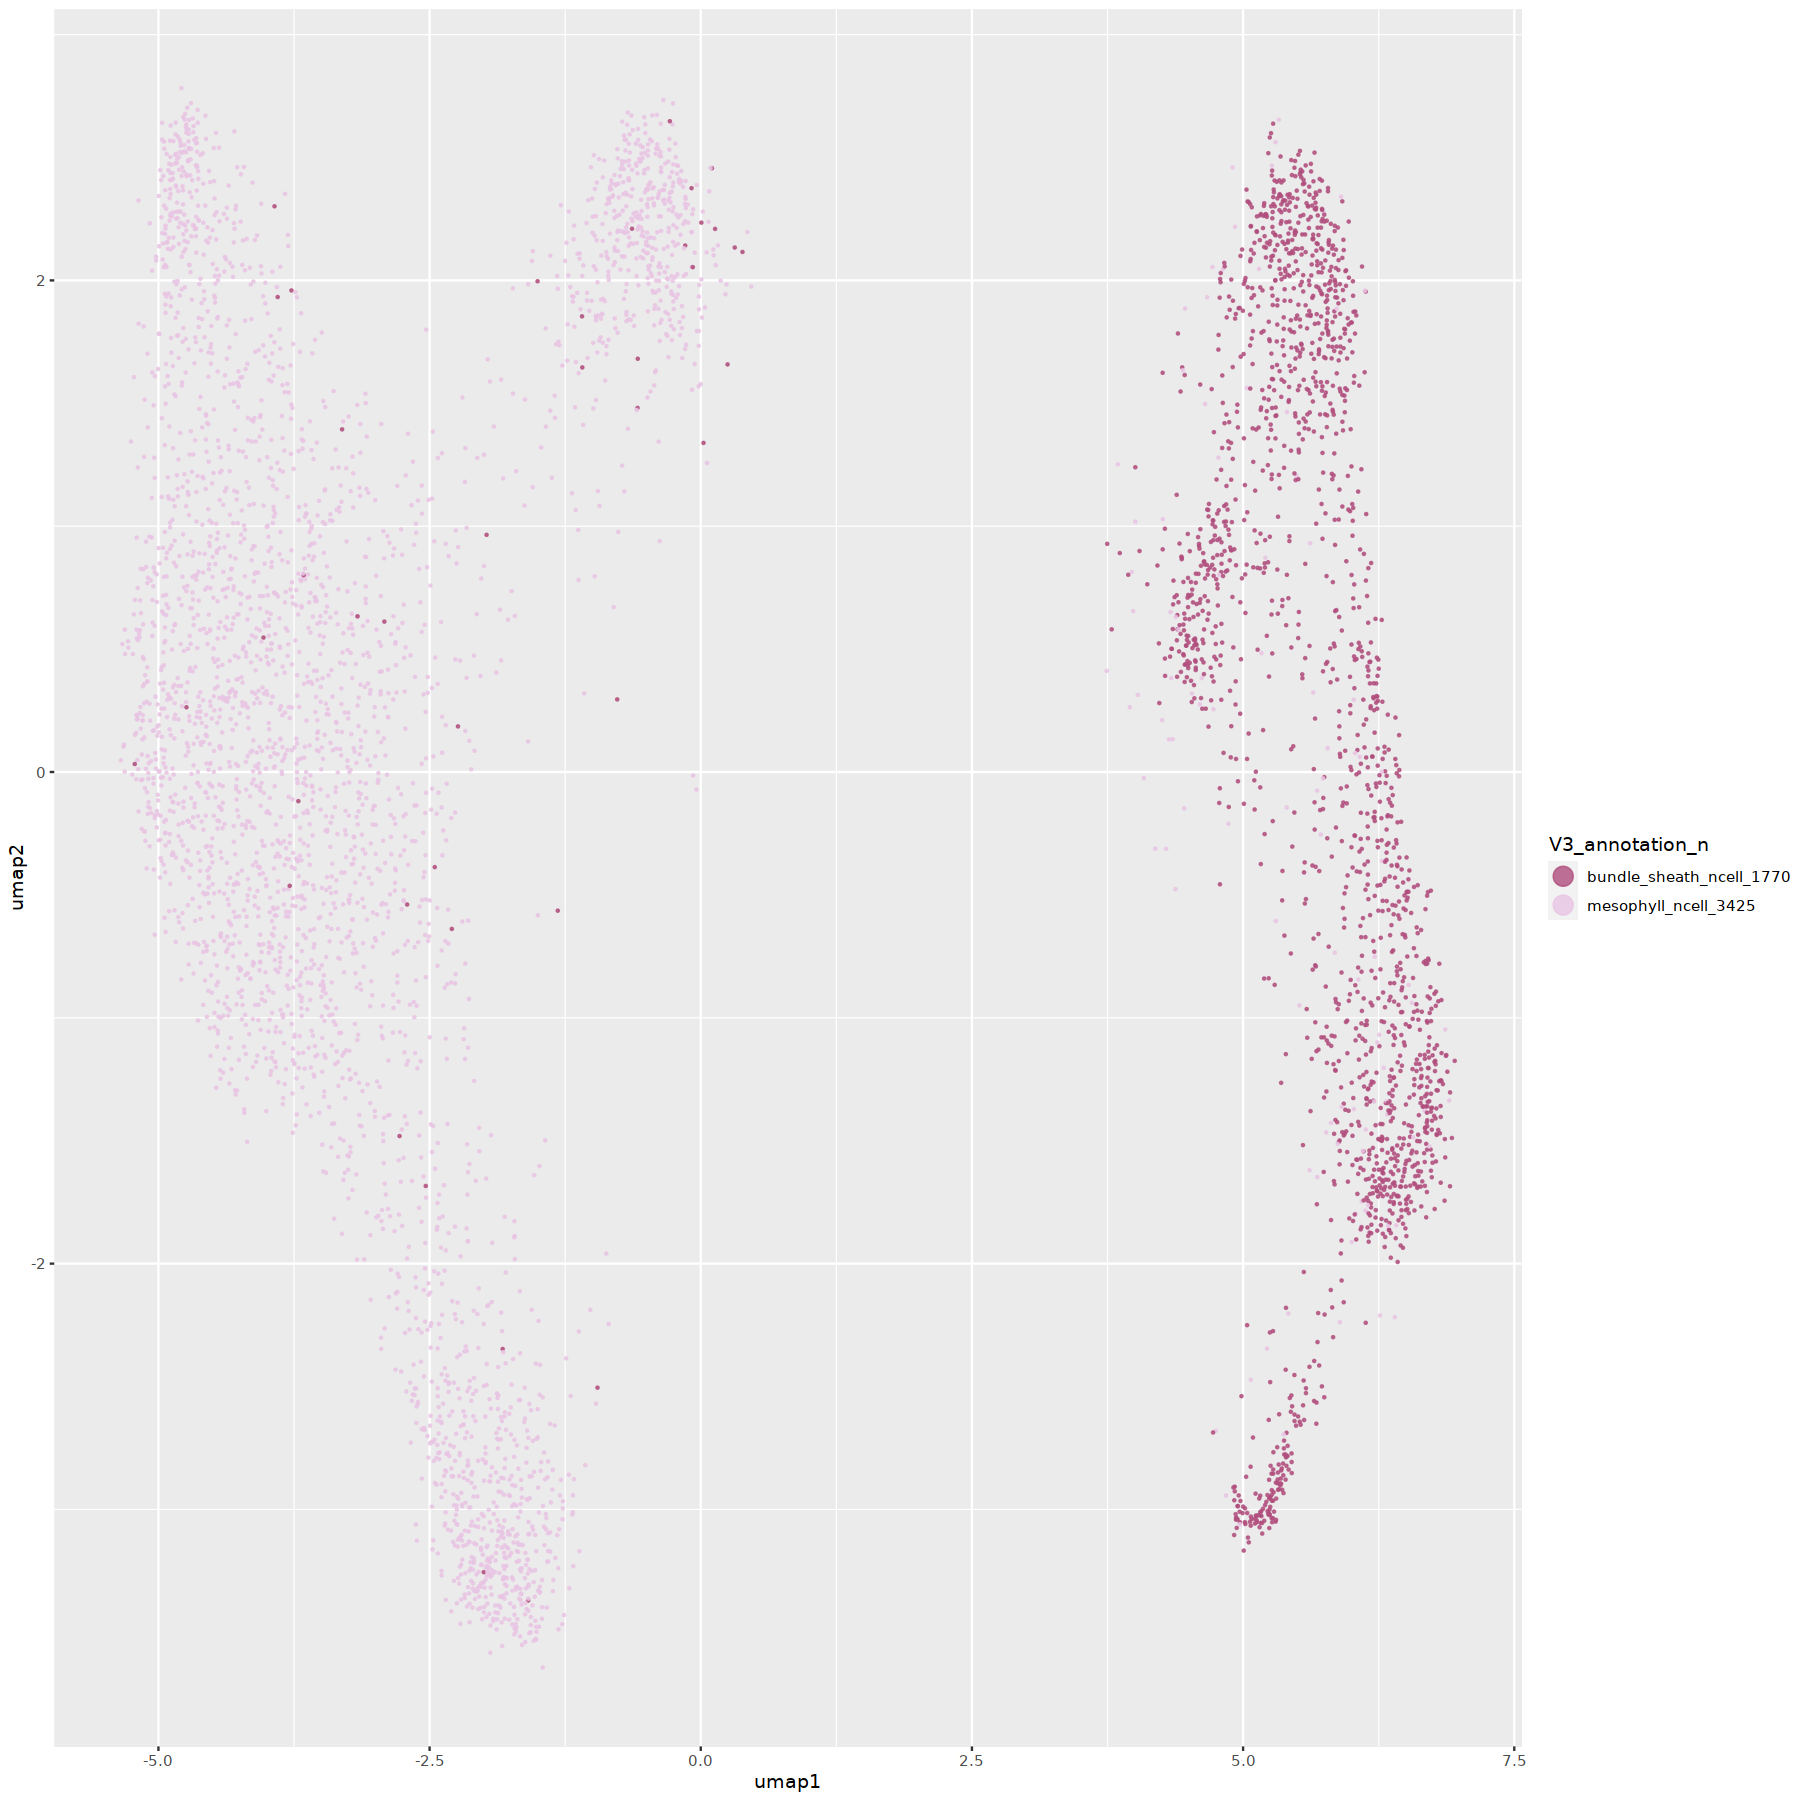

In [18]:
ggplot(Sb.subcluster.epidermal.tfidf$meta, aes(x=umap1, y = umap2, color = V3_annotation_n)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [19]:
# identify clusters using neighborhood graph -----------------------------
Sb.subcluster.epidermal.tfidf.clusters <- callClusters(Sb.subcluster.epidermal.tfidf, 
                        res=2.5,
                        k.near = 20,
                        #min.reads=1000,
                        verbose=T,
                        min.reads=1,
                        m.clst=1,
                        e.thresh = 20,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=F)


 - filtering outliers in UMAP manifold (z-score e.thresh = 20) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5195
Number of edges: 233071

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.6215
Number of communities: 15
Elapsed time: 4 seconds


1 singletons identified. 14 final clusters.

 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



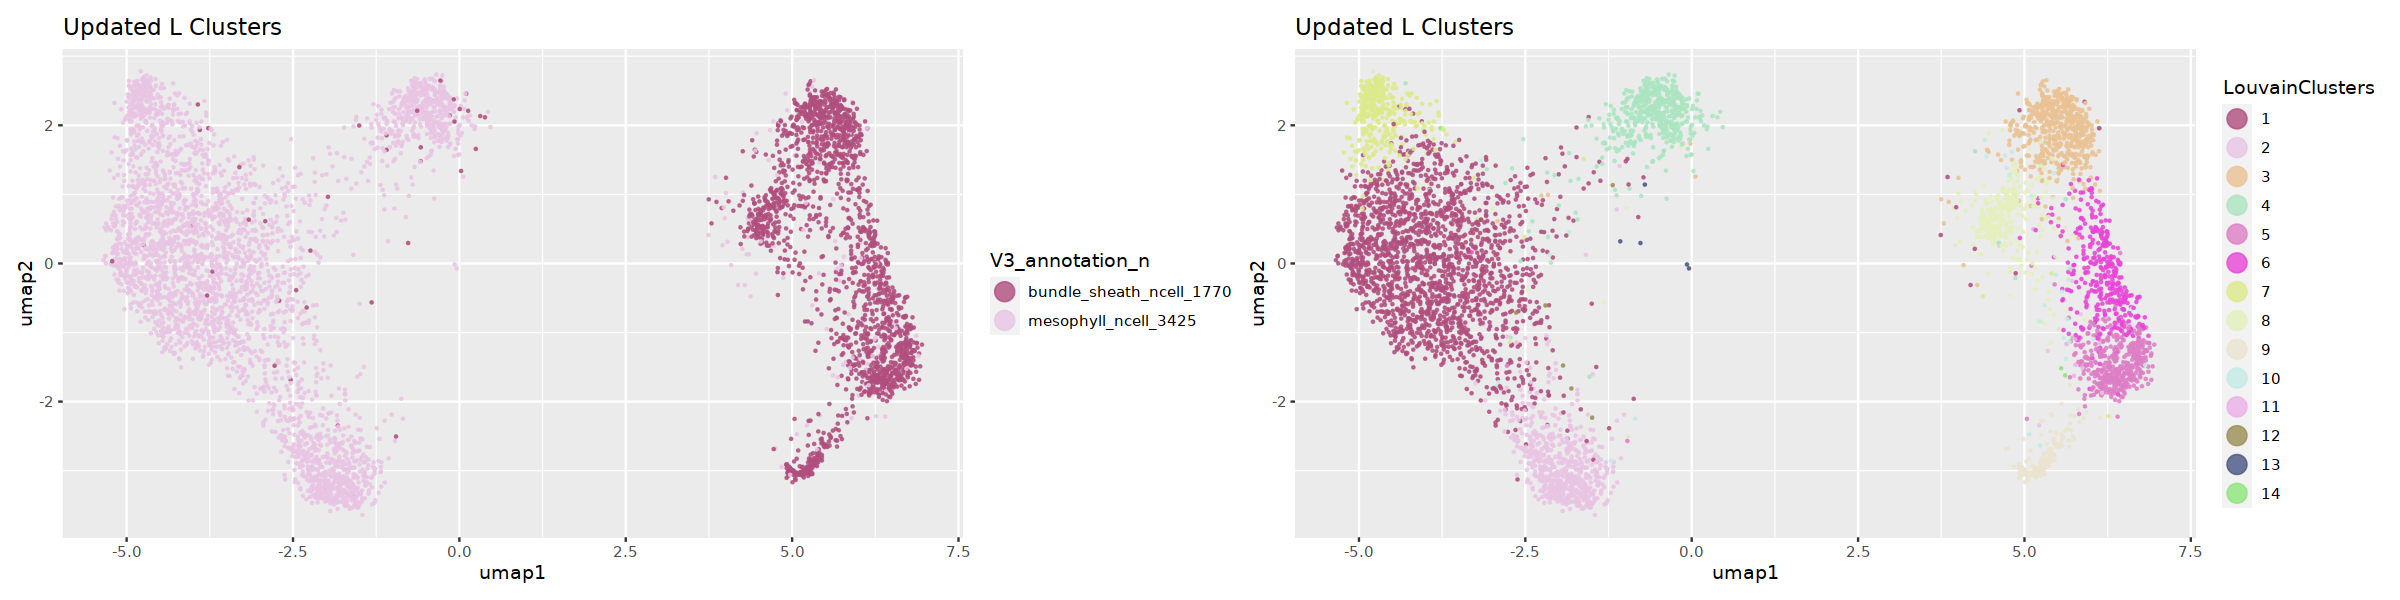

In [20]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Sb.subcluster.epidermal.tfidf.clusters$sub_cluster, aes(x=umap1, y = umap2, color = V3_annotation_n)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")

new_clusters <- ggplot(Sb.subcluster.epidermal.tfidf.clusters$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")

old_clusters + new_clusters 

In [21]:
Sb.subcluster.epidermal.tfidf.clusters$sub_cluster  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(n())

LouvainClusters,n()
<fct>,<int>
1,1904
2,619
3,545
4,492
5,426
6,353
7,337
8,291
9,170


In [22]:
library("presto")
run_presto <- function(meta_obj, 
                       meta_slot = "Clusters", 
                       cluster_name = "LouvainClusters", 
                       counts_raw="acr_counts_raw"){
    ### Pull the correct meta datafrom the Socrates Object
    sparse_matrix <- meta_obj[[counts_raw]]
    meta_data <- meta_obj[[meta_slot]]
    
    print(head(as_tibble(meta_data)))
        
    ### Read the Giant Sparse Matrix
    loaded_sparse_matric <- read_delim(sparse_matrix, delim='\t', 
                                       col_names = c("gene_name", "barcode", "accessability"), 
                                       col_types = "ccn")
    
    print(head(loaded_sparse_matric))
    combined_large_w_sparse <- loaded_sparse_matric  %>% 
        filter(gene_name != "Annotation")  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        left_join(., meta_data, by = c("barcode" = "cellID"))  %>% 
        filter(is.na(!!sym(cluster_name)) != TRUE)  %>% 
        arrange(!!sym(cluster_name))
    
    #order <- combined_large_w_sparse[!!sym(cluster_name)]

    combined_large_w_sparse <- combined_large_w_sparse  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        mutate(across(accessability, as.numeric))
    
    
    gene_names <- unique(combined_large_w_sparse$gene_name)
    barcodes <- unique(combined_large_w_sparse$barcode)

    combined_large_w_sparse$row <- match(combined_large_w_sparse$gene_name, gene_names)
    combined_large_w_sparse$col <- match(combined_large_w_sparse$barcode, barcodes)


    UIMatrix <- sparseMatrix(i = combined_large_w_sparse$row,
                         j = combined_large_w_sparse$col,
                         x = combined_large_w_sparse$accessability,
                         dimnames=list(gene_names, barcodes))

    print(head(tibble(barcode = unlist(UIMatrix@Dimnames[2]))))
    barcode_tibble <- tibble(barcode = unlist(UIMatrix@Dimnames[2])) %>% 
        left_join(., as_tibble(meta_data), by = c("barcode" = "cellID"))  %>% 
        filter(is.na(total) != TRUE)
    
    print(dim(barcode_tibble))
    print(dim(UIMatrix))
    
    clust_name <- c(cluster_name)
    garbbed_louv_order <- pull(barcode_tibble,!!sym(clust_name))

    sparse_matrix_test <- wilcoxauc(UIMatrix, garbbed_louv_order)
    
    meta_obj[["presto_marker"]] <- sparse_matrix_test
    
    return(meta_obj)
}


Loading required package: data.table


Attaching package: 'data.table'


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:reshape2':

    dcast, melt




In [23]:
setwd("/scratch/jpm73279/comparative_single_cell/dev_location")
Sb.subcluster.epidermal.tfidf.clusters$all_genes <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.gene.bed"
#bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"
genome_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.mainGenome.MtPt.fasta.fai"

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
tfidf.obj.dob.filt.clusters.counts <- Sb.subcluster.epidermal.tfidf.clusters
tfidf.obj.dob.filt.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"

## Execute Annotation Attempt #1

library(presto)
Sb.subcluster.tfidf.clusters.final <- run_presto(tfidf.obj.dob.filt.clusters.counts,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 25
  cellID      total   tss  acrs  ptmt nSites log10nSites sampleID  umap1   umap2
  <chr>       <dbl> <dbl> <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl>   <dbl>
1 BC:Z:ACAGT…  3800  2334  3293     0   1944        3.29 rep1     -0.511  2.60  
2 BC:Z:ACAGT…   948   605   852     0    513        2.71 rep1     -3.11  -0.316 
3 BC:Z:ACAGT…  1347   898  1146     0    714        2.85 rep1     -3.83   0.0715
4 BC:Z:ACAGT…  2323  1377  1964     0   1222        3.09 rep1     -0.308  1.77  
5 BC:Z:ACAGT…  5770  3685  4956     0   2912        3.46 rep1     -4.59   1.01  
6 BC:Z:ACAGT… 14929  9001 11196     0   7116        3.85 rep1     -5.22   0.151 
# … with 15 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, cell_annotation_glmnet <chr>,
#   cell_annotation_knn <chr>, cell_annotation_enrich <chr>,
#   cell_annotation_smooth <chr>, cluster_annotation_glmnet <chr>,
#   cluster_annotation_knn <chr>, cluster_annotation_smooth <chr>,
#   cluster_annotat

In [24]:
grabbed_top_marker_per_cluster <- top_markers(Sb.subcluster.tfidf.clusters.final$presto_marker, 200)


represented_marker_lst <- list()
for (i in unique(Sb.subcluster.tfidf.clusters.final$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


rank,geneID,chr,start,end,name,type,tissue
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
21,Sorbiv5.1_pg15362.valid.m24.g,Chr03,63610236,63623676,cah1,mesophyll,axillaryBud;leaf
33,Sobic.008G193300,Chr08,65745228,65750046,sut2,"companion_cells,xylem_parenchyma,phloem_parenchyma,pith_parenchyma",axillaryBud;leaf;crownRoot;root;tassel;ear
69,Sobic.010G160700,Chr10,48834723,48842334,pepc1,mesophyll,axillaryBud;leaf
131,Sobic.001G537300,Chr01,84195608,84203525,rld1,"SAM,leaf_primordia,provascular_strands,protoxylem",axillaryBud;leaf
160,Sorbiv5.1_pg14938.valid.m7.g,Chr03,8560607,8567782,ocl1,"protoderm,L1_SAM,L1_leaf_primordia,L1_proximal_meristem,atrichoblast,L1_inflorescence_meristem,L1_spikelet_pair_meristem,L1_spikelet_meristem,L1_upper_floral_meristem,L1_lower_floral_meristem,L1_stamen_primordia,L1_palea_primordia,L1_lemma_primordia,L1_glume_primordia,L1_branch_meristem,L1_pistil_primordia",axillaryBud;leaf;crownRoot;root;tassel;ear
rank,geneID,chr,start,end,name,type,tissue
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Sobic.010G160700,Chr10,48834723,48842334,pepc1,mesophyll,axillaryBud;leaf
2,Sorbiv5.1_pg15362.valid.m24.g,Chr03,63610236,63623676,cah1,mesophyll,axillaryBud;leaf


In [25]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)



In [26]:

prefix <- "Sb_leaf.merged_replicates.Subclustering_mesophyll.V2.mesophyll_BS"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/"

# output text files
nmf.meta <- Sb.subcluster.tfidf.clusters.final$sub_cluster
nmf.rd <- Sb.subcluster.tfidf.clusters.final$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Sb.subcluster.tfidf.clusters.final$counts))
trip$i <- rownames(Sb.subcluster.tfidf.clusters.final$counts)[trip$i]
trip$j <- colnames(Sb.subcluster.tfidf.clusters.final$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")



In [27]:


#Go ahead and load the Gff3 file and the Bed file in order to calculate the gene body accessability of all genes in the genome
#note that currently we're calculating 500 Bps up and downstream of each given gene.
Sb.subcluster.tfidf.clusters.final <- reload_bed_file(Sb.subcluster.tfidf.clusters.final, "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC.merged.unique.tn5.sorted.bed")
Sb.subcluster.tfidf.clusters.final <- reload_gff_file(Sb.subcluster.tfidf.clusters.final, "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.primaryTrs.gff3")
Sb.subcluster.tfidf.clusters.final <- GeneBodyAccessibility(Sb.subcluster.tfidf.clusters.final)



Warning message in .Seqinfo.mergexy(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': scaffold_1889, scaffold_2171, scaffold_2293, scaffold_2764, scaffold_384, scaffold_639, scaffold_88
  - in 'y': scaffold_1419, scaffold_210, scaffold_35, scaffold_658, scaffold_712, scaffold_725, scaffold_934
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."


In [28]:
Sb.subcluster.tfidf.clusters.final <- acc.imputation(Sb.subcluster.tfidf.clusters.final, 
                               meta_slot = "sub_cluster",
                                tar_clust_colnm = "LouvainClusters",
                               k=25,
                               step=1,
                               npcs=10,
                               cleanExp=F,
                               df=NULL,
                               rds=NULL,
                               prefix="test.viz"
                              )


 - set the ipt files

-the target clust column name is LouvainClusters

 - normalizing libraries ...

 - extracting average gene activity across cells per cluster ...

 - fitting mixture model ...

 - scaling by cluster averages ...



        9         4         4         9         4         4         4         9 
0.7352941 0.6260163 0.6260163 0.7352941 0.6260163 0.6260163 0.6260163 0.7352941 
        4         4 
0.6260163 0.6260163 


 - lib size before size factors = 



BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1 
                                                     22134 
BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1 
                                                      6736 
BC:Z:ACAGTGAGTCAAACTCGGTAGAGGGAA-Sorghum_leaf.sciATAC_rep1 
                                                      9788 
BC:Z:ACAGTGAGTCAAACTCGGTTTCGCGCG-Sorghum_leaf.sciATAC_rep1 
                                                     12577 
BC:Z:ACAGTGAGTCAAAGCGAATGAGCGTTT-Sorghum_leaf.sciATAC_rep1 
                                                     42910 
BC:Z:ACAGTGAGTCAAAGCGACAAAAGTCGG-Sorghum_leaf.sciATAC_rep1 
                                                    116640 


 - estimating normalization factors ...

 - unnormalized activities:



6 x 5 sparse Matrix of class "dgCMatrix"
                     BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1
888jpa7.g114936.t1.g                                                          .
888jpa7.g116981.t1.g                                                          .
888jpa7.g117717.t1.g                                                          .
888jpa7.g121623.t1.g                                                          .
888jpa7.g135363.t1.g                                                          .
888jpa7.g135679.t1.g                                                          .
                     BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1
888jpa7.g114936.t1.g                                                          .
888jpa7.g116981.t1.g                                                          .
888jpa7.g117717.t1.g                                                          .
888jpa7.g121623.t1.g                                                          .

 - normalization factors:



BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1 
                                                 0.8536657 
BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1 
                                                 0.2597945 
BC:Z:ACAGTGAGTCAAACTCGGTAGAGGGAA-Sorghum_leaf.sciATAC_rep1 
                                                 0.3775043 
BC:Z:ACAGTGAGTCAAACTCGGTTTCGCGCG-Sorghum_leaf.sciATAC_rep1 
                                                 0.4850706 
BC:Z:ACAGTGAGTCAAAGCGAATGAGCGTTT-Sorghum_leaf.sciATAC_rep1 
                                                 1.6549560 
BC:Z:ACAGTGAGTCAAAGCGACAAAAGTCGG-Sorghum_leaf.sciATAC_rep1 
                                                 4.4985799 


 - normalized activities:



6 x 5 sparse Matrix of class "dgCMatrix"
                     BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1
888jpa7.g114936.t1.g                                                          .
888jpa7.g116981.t1.g                                                          .
888jpa7.g117717.t1.g                                                          .
888jpa7.g121623.t1.g                                                          .
888jpa7.g135363.t1.g                                                          .
888jpa7.g135679.t1.g                                                          .
                     BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1
888jpa7.g114936.t1.g                                                          .
888jpa7.g116981.t1.g                                                          .
888jpa7.g117717.t1.g                                                          .
888jpa7.g121623.t1.g                                                          .

 - lib size after size factors = 



BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1 
                                                  25928.18 
BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1 
                                                  25928.18 
BC:Z:ACAGTGAGTCAAACTCGGTAGAGGGAA-Sorghum_leaf.sciATAC_rep1 
                                                  25928.18 
BC:Z:ACAGTGAGTCAAACTCGGTTTCGCGCG-Sorghum_leaf.sciATAC_rep1 
                                                  25928.18 
BC:Z:ACAGTGAGTCAAAGCGAATGAGCGTTT-Sorghum_leaf.sciATAC_rep1 
                                                  25928.18 
BC:Z:ACAGTGAGTCAAAGCGACAAAAGTCGG-Sorghum_leaf.sciATAC_rep1 
                                                  25928.18 


 - cells = 5195 | genes = 34808



6 x 10 sparse Matrix of class "dgCMatrix"


   [[ suppressing 10 column names 'BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1', 'BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1', 'BC:Z:ACAGTGAGTCAAACTCGGTAGAGGGAA-Sorghum_leaf.sciATAC_rep1' ... ]]



                                        
888jpa7.g114936.t1.g . . . . . . . . . .
888jpa7.g116981.t1.g . . . . . . . . . .
888jpa7.g117717.t1.g . . . . . . . . . .
888jpa7.g121623.t1.g . . . . . . . . . .
888jpa7.g135363.t1.g . . . . . . . . . .
888jpa7.g135679.t1.g . . . . . . . . . .


 - returning normalized matrix ...



6 x 5195 sparse Matrix of class "dgCMatrix"


   [[ suppressing 5195 column names 'BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1', 'BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1', 'BC:Z:ACAGTGAGTCAAACTCGGTAGAGGGAA-Sorghum_leaf.sciATAC_rep1' ... ]]



                                                                               
888jpa7.g114936.t1.g . . . . . . . . . . . . . . .   .      . . . . . . . . . .
888jpa7.g116981.t1.g . . . . . . . . . . . . . . .   .      . . . . . . . . . .
888jpa7.g117717.t1.g . . . . . . . . . . . . . . . 108.1381 . . . . . . . . . .
888jpa7.g121623.t1.g . . . . . . . . . . . . . . .   .      . . . . . . . . . .
888jpa7.g135363.t1.g . . . . . . . . . . . . . . .   .      . . . . . . . . . .
888jpa7.g135679.t1.g . . . . . . . . . . . . . . .   .      . . . . . . . . . .
                                                                            
888jpa7.g114936.t1.g . .  .      . . . . . .  .       . . . . . .        . .
888jpa7.g116981.t1.g . .  .      . . . . . .  .       . . . . . .        . .
888jpa7.g117717.t1.g . . 24.0187 . . . . . .  .       . . . . . 3.588414 . .
888jpa7.g121623.t1.g . .  .      . . . . . . 15.17478 . . . . . 3.588414 . .
888jpa7.g135363.t1.g . .  .      . . . . . .  .       .

 - imputing gene activity ...

   * PC manifold set to NULL, running LSI (TFIDF)...



ERROR: Error: $ operator not defined for this S4 class


In [ ]:
source("/home/jpm73279/Socrates/R/marker_visualization.R")

In [ ]:


# Note here that if not given an output directory the function returns a plot to visualize. 
#Be careful to NOT overwrite the Socrates object. Finally make sure to put the marker file in 
#the socraates object. \

library("cowplot")
Sb.subcluster.tfidf.clusters.final$markers <- marker_list_sb
head(Sb.subcluster.tfidf.clusters.final$markers)

marker_vex_mixed <- c('dct2_ortho_count_1','bhlh43','ssu2__ssu1','me3_ortho_count_1',
                      'sut1__sut7','sut3','sut2','sut2', "gl1")
marker_plot <- viz_markers(Sb.subcluster.tfidf.clusters.final, 
                        meta_slot = "sub_cluster",
                       imputed_slot= "impute.acc",
                       marker_slot = "all", 
                       markers = marker_vex_mixed,
                       output_file = "sub_clustering.marker_viz.pdf",
                       output_dir = "/home/jpm73279")



## Cluster on Peaks

In [29]:
str(sb.loaded_socrates_data.epidermal$Clusters)

spec_tbl_df [14,947 × 25] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ cellID                   : chr [1:14947] "BC:Z:ACAGTGAGTCAAAAACAACTGATGGAA-Sorghum_leaf.sciATAC_rep1" "BC:Z:ACAGTGAGTCAAAAACAATTCCTTCAT-Sorghum_leaf.sciATAC_rep1" "BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1" "BC:Z:ACAGTGAGTCAAAAACAGGTAGCGATG-Sorghum_leaf.sciATAC_rep1" ...
 $ total                    : num [1:14947] 1479 6966 3800 2988 3336 ...
 $ tss                      : num [1:14947] 820 4365 2334 1812 2040 ...
 $ acrs                     : num [1:14947] 1245 5704 3293 2270 2243 ...
 $ ptmt                     : num [1:14947] 0 0 0 0 0 0 0 0 0 0 ...
 $ nSites                   : num [1:14947] 884 3799 2156 1736 1863 ...
 $ log10nSites              : num [1:14947] 2.95 3.58 3.33 3.24 3.27 ...
 $ sampleID                 : chr [1:14947] "rep1" "rep1" "rep1" "rep1" ...
 $ umap1                    : num [1:14947] -4.236 -6.733 0.758 4.445 1.499 ...
 $ umap2                    : num [1:14947] 4.99 -1.11 

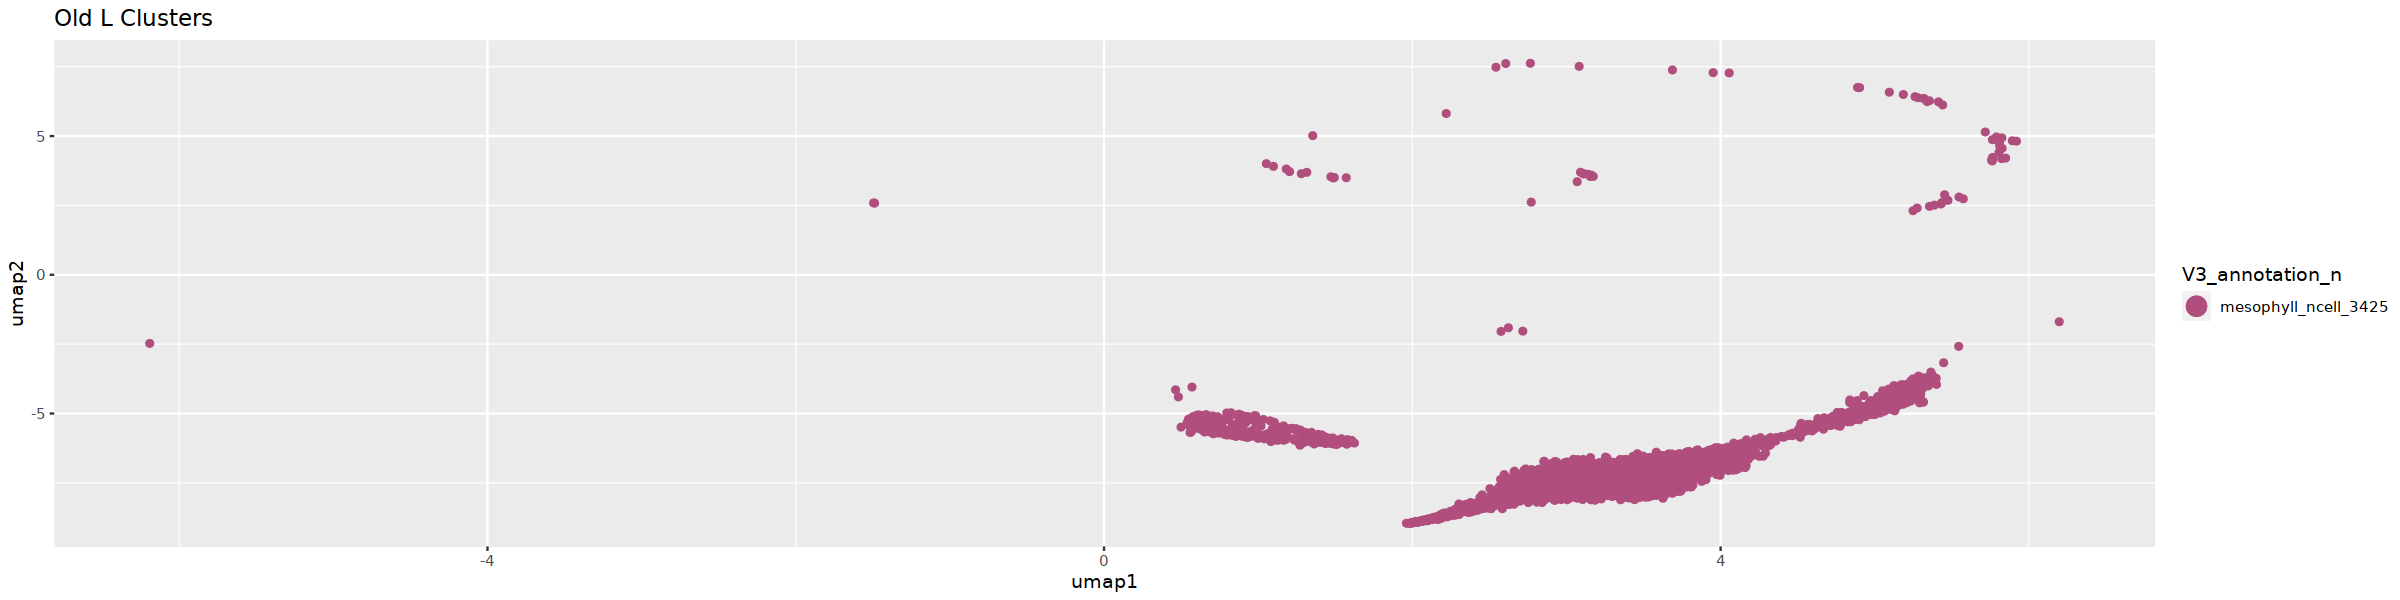

In [30]:

Sb.subcluster.epidermal <- Sb.subcluster
Sb.subcluster.epidermal$Clusters <- sb.final.v3

clusters <- c("mesophyll_ncell_3425")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.loaded_socrates_data.epidermal$Clusters  %>% 
    filter(V3_annotation_n %in% clusters) %>% 
    group_by(V3_annotation_n) %>% 
    ggplot(., aes(umap1, umap2, color = V3_annotation_n)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.loaded_socrates_data.epidermal$Clusters %>% 
    dplyr::filter(V3_annotation_n %in% clusters)

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Sb.subcluster.epidermal$meta <- meta_df
Sb.subcluster.epidermal$meta.v3 <- meta_df

Sb.subcluster.epidermal$acr <- read.table("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/Sb_peak_calls/Sb.peaks/Sb.peaks.500bp_peaks.bed")

In [31]:
Sb.subcluster.epidermal <- generateMatrix(Sb.subcluster.epidermal, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                              verbose=TRUE)

In [32]:
Sb.subcluster.epidermal <- convertSparseData(Sb.subcluster.epidermal, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [33]:
# clean sparse counts matrix ---------------------------------------------
Sb.subcluster.epidermal.clean <- cleanData(Sb.subcluster.epidermal, 
                     min.t=0.02,  # minimum feature frequency across cells
                     max.t=0.1, # maximum feature frequency across cells
                     verbose=T)


   * Input: cells = 3425 | peaks = 67812

   * Filtered: cells = 3424 | peaks = 23337



In [34]:
# normalize with TFIDF ---------------------------------------------------
Sb.subcluster.epidermal.tfidf <- tfidf(Sb.subcluster.epidermal.clean)

In [35]:
# project with NMF -------------------------------------------------------
Sb.subcluster.epidermal.tfidf <- reduceDims(Sb.subcluster.epidermal.tfidf,
                      method="SVD", 
                      n.pcs=50, 
                      svd_slotName="SVD")

In [36]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Sb.subcluster.epidermal.tfidf <- projectUMAP(Sb.subcluster.epidermal.tfidf, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

 - non-linear dimensionality reduction with UMAP ...

11:45:37 UMAP embedding parameters a = 1.577 b = 0.8951

11:45:37 Read 3424 rows and found 49 numeric columns

11:45:37 Using Annoy for neighbor search, n_neighbors = 30

11:45:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:45:38 Writing NN index file to temp file /tmp/RtmphTXIIZ/file26c4b4cc6f51f

11:45:38 Searching Annoy index using 16 threads, search_k = 3000

11:45:38 Annoy recall = 100%

11:45:55 Commencing smooth kNN distance calibration using 16 threads

11:46:01 Initializing from normalized Laplacian + noise

11:46:01 Commencing optimization for 500 epochs, with 136574 positive edges

11:46:18 Optimization finished



In [37]:
# identify clusters using neighborhood graph -----------------------------
Sb.subcluster.epidermal.tfidf.clusters <- callClusters(Sb.subcluster.epidermal.tfidf, 
                        res=2.5,
                        k.near = 20,
                        #min.reads=1000,
                        verbose=T,
                        min.reads=1,
                        m.clst=1,
                        e.thresh = 20,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=F)


 - filtering outliers in UMAP manifold (z-score e.thresh = 20) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3424
Number of edges: 99832

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.3220
Number of communities: 12
Elapsed time: 3 seconds


2 singletons identified. 10 final clusters.

 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



In [38]:
colnames(Sb.subcluster.epidermal.tfidf.clusters$meta)

[1] "cellID"                    "total"                    
 [3] "tss"                       "acrs"                     
 [5] "ptmt"                      "nSites"                   
 [7] "log10nSites"               "sampleID"                 
 [9] "umap1"                     "umap2"                    
[11] "doubletscore"              "d.type"                   
[13] "LouvainClusters"           "cell_annotation_glmnet"   
[15] "cell_annotation_knn"       "cell_annotation_enrich"   
[17] "cell_annotation_smooth"    "cluster_annotation_glmnet"
[19] "cluster_annotation_knn"    "cluster_annotation_smooth"
[21] "cluster_annotation_enrich" "LouvainClusters_t"        
[23] "V3_final_annnotation"      "total_cell_count"         
[25] "V3_annotation_n"

In [39]:
old <- ggplot(Sb.subcluster.epidermal.tfidf.clusters$sub_cluster, aes(x=umap1, y = umap2, color = V3_annotation_n)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")

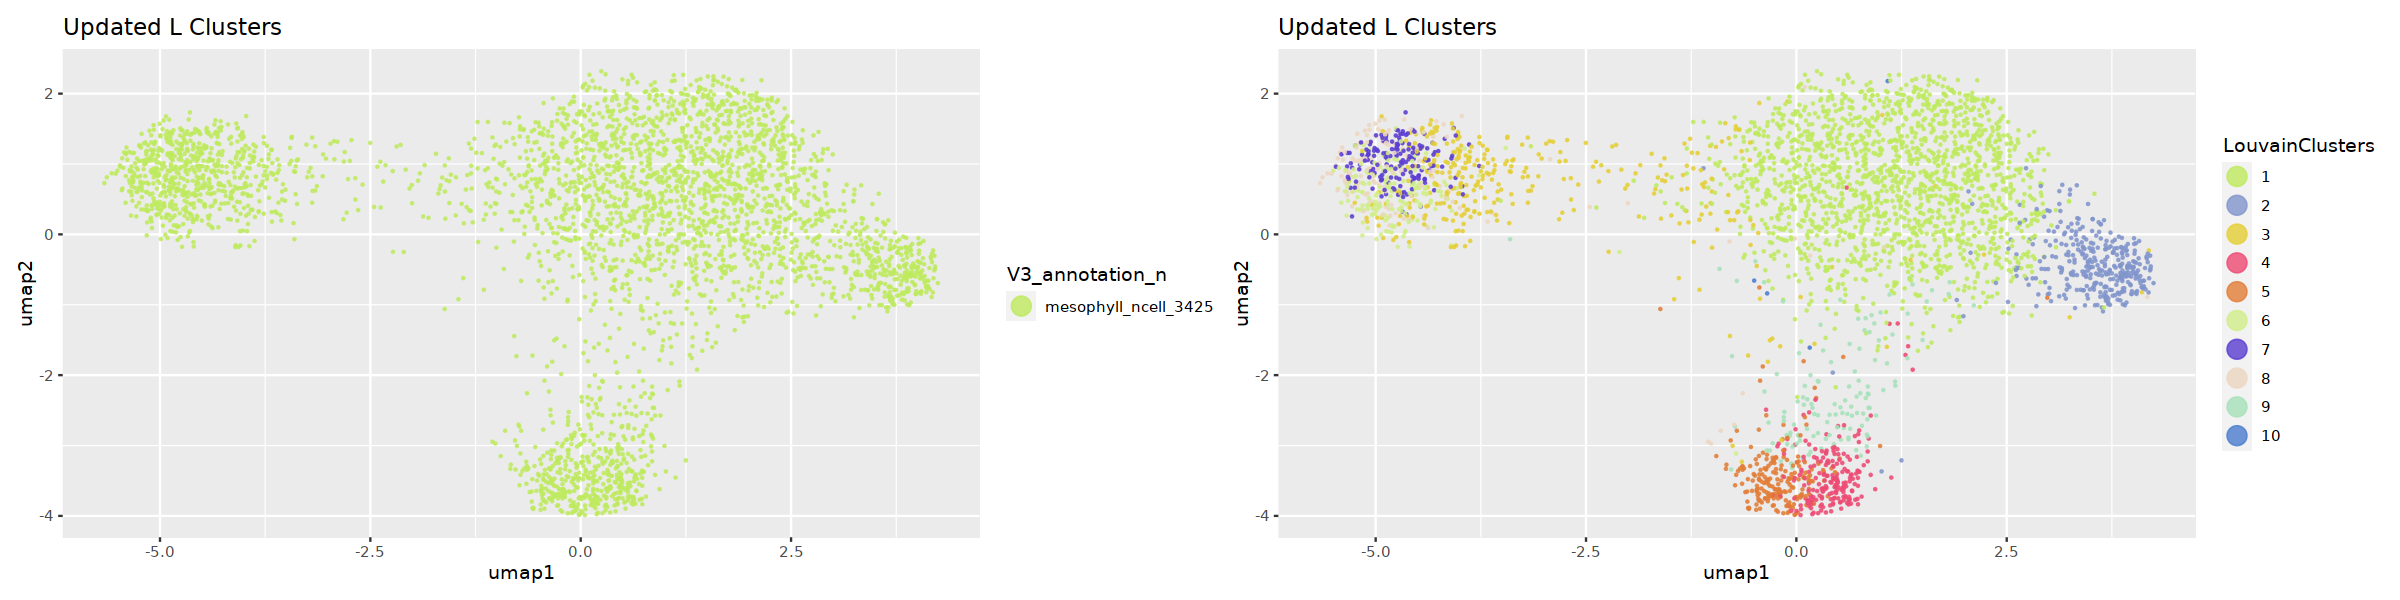

In [40]:
options(repr.plot.width=20, repr.plot.height=5)


new_clusters <- ggplot(Sb.subcluster.epidermal.tfidf.clusters$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")

old + new_clusters 

In [47]:
setwd("/scratch/jpm73279/comparative_single_cell/dev_location")
Sb.subcluster.epidermal.tfidf.clusters$all_genes <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.gene.bed"
#bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"
genome_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.mainGenome.MtPt.fasta.fai"

### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
tfidf.obj.dob.filt.clusters.counts <- Sb.subcluster.epidermal.tfidf.clusters
tfidf.obj.dob.filt.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"

## Execute Annotation Attempt #1

library(presto)
Sb.subcluster.tfidf.clusters.final <- run_presto(tfidf.obj.dob.filt.clusters.counts,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 25
  cellID    total   tss  acrs  ptmt nSites log10nSites sampleID    umap1   umap2
  <chr>     <dbl> <dbl> <dbl> <dbl>  <dbl>       <dbl> <chr>       <dbl>   <dbl>
1 BC:Z:ACA…  3800  2334  3293     0   1467        3.17 rep1      2.92e-4 -3.73  
2 BC:Z:ACA…   948   605   852     0    401        2.60 rep1      9.05e-1 -0.143 
3 BC:Z:ACA…  1347   898  1146     0    539        2.73 rep1      5.55e-1 -0.0798
4 BC:Z:ACA…  2323  1377  1964     0    944        2.97 rep1     -4.83e-1 -3.20  
5 BC:Z:ACA…  5770  3685  4956     0   2175        3.34 rep1      2.29e+0  0.0798
6 BC:Z:ACA… 14929  9001 11196     0   4732        3.68 rep1      2.55e+0  1.29  
# … with 15 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, cell_annotation_glmnet <chr>,
#   cell_annotation_knn <chr>, cell_annotation_enrich <chr>,
#   cell_annotation_smooth <chr>, cluster_annotation_glmnet <chr>,
#   cluster_annotation_knn <chr>, cluster_annotation_smooth <chr>,
#   cluster_annotat

In [48]:
grabbed_top_marker_per_cluster

rank,1,10,2,3,4,5,6,7,8,9
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Sorbiv5.1_pg9603.valid.m4.g,Sobic.006G073500,Sobic.004G192100,ta.jpa7.902.31998f3.g,Sobic.005G029700,ta.jpa7.902.31998f3.g,Sorbiv5.1_pg24412.valid.m1.g,Sorbiv5.1_pg24412.valid.m1.g,ta.jpa7.902.31998f3.g,Sobic.005G029700
2,Sobic.010G026500,Sobic.010G131700,Sobic.002G083200,Sobic.001G541300,Sobic.007G213925,Sobic.006G032200,Sobic.004G270350,ta.jpa7.902.31998f3.g,Sorbiv5.1_pg24412.valid.m1.g,888jpa7.g165858.t1.g
3,Sorbiv5.1_pg6411.valid.m15.g,Sobic.009G148000,Sobic.003G258700,ta.jpa7.902.9313FPf2.g,Sobic.001G160200,Sobic.003G339032,ta.jpa7.902.31998f3.g,Sorbiv5.1_pg12309.m1.g,Sobic.004G270350,Sobic.001G176800
4,Sobic.008G157600,Sobic.006G258500,Sobic.001G438100,Sorbiv5.1_pg12309.m1.g,Sobic.006G150800,Sobic.005G029700,Sobic.009G146400,Sobic.007G197700,Sobic.007G197700,Sobic.007G213925
5,Sorbiv5.1_pg6457.m1.g,Sorbiv5.1_pg16171.valid.m4.g,Sobic.009G230100,Sobic.004G257700,Sorbiv5.1_pg13367.valid.m1.g,Sorbiv5.1_pg1807.valid.m6.g,Sorbiv5.1_pg16991.valid.m1.g,Sorbiv5.1_pg16991.valid.m1.g,Sobic.006G009900,Sorbiv5.1_pg11117.valid.m1.g
6,Sobic.002G134300,Sobic.003G059400,Sorbiv5.1_pg10047.valid.m1.g,Sobic.008G099100,Sobic.003G237300,Sobic.007G213925,Sorbiv5.1_pg9159.m1.g,Sorbiv5.1_pg2239.m1.g,Sobic.001G021601,Sorbiv5.1_pg4817.valid.m11.g
7,Sobic.003G340300,Sorbiv5.1_pg14604.valid.m3.g,Sobic.001G019700,Sobic.009G092300,Sobic.003G361300,Sobic.004G064000,Sobic.007G050800,Sorbiv5.1_pg2886.valid.m1.g,Sorbiv5.1_pg2886.valid.m1.g,Sobic.007G212250
8,Sobic.004G151800,Sobic.006G038100,Sobic.003G067700,Sobic.009G092200,Sobic.007G163800,Sobic.001G445850,Sorbiv5.1_pg29152.m1.g,Sobic.004G270350,Sobic.003G389100,Sobic.003G334000
9,Sobic.007G050650,Sobic.010G035300,ta.jpa7.902.35011FPf3.g,ta.jpa7.902.23866f2.g,Sobic.008G193300,Sobic.001G160200,Sobic.004G282200,Sobic.001G528100,Sobic.009G146400,Sobic.008G012600


In [49]:
grabbed_top_marker_per_cluster <- top_markers(Sb.subcluster.tfidf.clusters.final$presto_marker, 200)


represented_marker_lst <- list()
for (i in unique(Sb.subcluster.tfidf.clusters.final$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

rank,geneID,chr,start,end,name,type,tissue
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
30,Sobic.001G537300,Chr01,84195608,84203525,rld1,"SAM,leaf_primordia,provascular_strands,protoxylem",axillaryBud;leaf
59,Sorbiv5.1_pg1793.valid.m1.g,Chr01,13056142,13064330,bhlh43,bundle_sheath,axillaryBud;leaf
62,Sobic.004G062500,Chr04,5115447,5120789,bm5,vascular_sclerenchyma,axillaryBud;leaf;crownRoot;root;tassel;ear
119,Sobic.008G193300,Chr08,65745228,65750046,sut2,"companion_cells,xylem_parenchyma,phloem_parenchyma,pith_parenchyma",axillaryBud;leaf;crownRoot;root;tassel;ear
rank,geneID,chr,start,end,name,type,tissue
<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
106,Sorbiv5.1_pg17581.valid.m1.g,Chr07,58414843,58420660,kan1,abaxial_domains,leaf;tassel;ear;axillaryBud
142,Sorbiv5.1_pg29398.valid.m9.g,Chr09,61877772,61883554,agp2,pith_parenchyma,axillaryBud;leaf;crownRoot;root;tassel;ear
155,promotedunsizeleaf.jpa7.5977677.3849.c.g,Chr04,70906706,70910077,brk1,"subsidiary_mother_cell,developing_pavement_cell",axillaryBud;leaf


In [32]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Sb_leaf.merged_replicates.Subclustering_mesophyll.LouvainCluster_annot_V3.presto.V2.mesophyll_only.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster,rank,geneID,chr,start,end,name,type,tissue
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,134,promotedunsizeleaf.jpa7.5977677.3849.c.g,Chr04,70906706,70910077,brk1,"subsidiary_mother_cell,developing_pavement_cell",axillaryBud;leaf
1,147,Sorbiv5.1_pg17581.valid.m1.g,Chr07,58414843,58420660,kan1,abaxial_domains,leaf;tassel;ear;axillaryBud
2,17,Sorbiv5.1_pg15531.m1.g,Chr03,3341071,3347117,me3_ortho_count_1,bundle_sheath,axillaryBud;leaf
3,28,Sorbiv5.1_pg31052.valid.m1.g,Chr09,63154998,63156307,mute,"guard_mother_cell,SAM,leaf_primordia",axillaryBud;leaf
3,69,Sorbiv5.1_pg24873.valid.m3.g,Chr02,2529322,2534592,ZmAAP6_1,xylem_parenchyma,axillaryBud;leaf;crownRoot;root;tassel;ear
3,128,Sobic.001G267100,Chr01,54978216,54983302,ZmLAX2,"procambial_meristem,root_tip_epidermis,root_tip_pericycle,root_tip_endodermis",axillaryBud;leaf;crownRoot;root;tassel;ear
4,13,Sobic.008G193300,Chr08,65745228,65750046,sut2,"companion_cells,xylem_parenchyma,phloem_parenchyma,pith_parenchyma",axillaryBud;leaf;crownRoot;root;tassel;ear
4,173,Sorbiv5.1_pg14938.valid.m7.g,Chr03,8560607,8567782,ocl1,"protoderm,L1_SAM,L1_leaf_primordia,L1_proximal_meristem,atrichoblast,L1_inflorescence_meristem,L1_spikelet_pair_meristem,L1_spikelet_meristem,L1_upper_floral_meristem,L1_lower_floral_meristem,L1_stamen_primordia,L1_palea_primordia,L1_lemma_primordia,L1_glume_primordia,L1_branch_meristem,L1_pistil_primordia",axillaryBud;leaf;crownRoot;root;tassel;ear
4,190,Sobic.006G160800,Chr06,53277281,53280510,zyb14,"leaf_primordia,leaf_tips",axillaryBud;leaf


In [43]:

prefix <- "Sb_leaf.merged_replicates.Subclustering_mesophyll.V2.only_mesophyll"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/"

# output text files
nmf.meta <- Sb.subcluster.epidermal.tfidf.clusters$sub_cluster
nmf.rd <- Sb.subcluster.epidermal.tfidf.clusters$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Sb.subcluster.epidermal.tfidf.clusters$counts))
trip$i <- rownames(Sb.subcluster.epidermal.tfidf.clusters$counts)[trip$i]
trip$j <- colnames(Sb.subcluster.epidermal.tfidf.clusters$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")



In [44]:
saveRDS(Sb.subcluster.epidermal.tfidf.clusters, file = paste0(output_location, prefix, ".rds"))

In [45]:
Sb.subcluster.tfidf.clusters.final$sub_cluster

,cellID,total,tss,acrs,ptmt,nSites,log10nSites,sampleID,umap1,umap2,⋯,cell_annotation_enrich,cell_annotation_smooth,cluster_annotation_glmnet,cluster_annotation_knn,cluster_annotation_smooth,cluster_annotation_enrich,LouvainClusters_t,V3_final_annnotation,total_cell_count,V3_annotation_n
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAAAACAGAGTGGCGAG-Sorghum_leaf.sciATAC_rep1,3800,2334,3293,0,1467,3.166430,rep1,-0.34892019,-3.50701154,⋯,subsidiary_cell,mesophyll,mesophyll,leaf_tips,mesophyll,mesophyll,11,mesophyll,3425,mesophyll_ncell_3425
BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAACCCCCGTACGCGCA-Sorghum_leaf.sciATAC_rep1,948,605,852,0,401,2.603144,rep1,1.07528311,-0.02135063,⋯,parenchyma,mesophyll,mesophyll,mesophyll,mesophyll,mesophyll,14,mesophyll,3425,mesophyll_ncell_3425
BC:Z:ACAGTGAGTCAAACTCGGTAGAGGGAA-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAACTCGGTAGAGGGAA-Sorghum_leaf.sciATAC_rep1,1347,898,1146,0,539,2.731589,rep1,2.63990072,0.41929483,⋯,xylem,mesophyll,mesophyll,mesophyll,mesophyll,mesophyll,3,mesophyll,3425,mesophyll_ncell_3425
BC:Z:ACAGTGAGTCAAACTCGGTTTCGCGCG-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAACTCGGTTTCGCGCG-Sorghum_leaf.sciATAC_rep1,2323,1377,1964,0,944,2.974972,rep1,-0.74960753,-3.36846555,⋯,cryptic_bract_primordia,mesophyll,mesophyll,leaf_tips,mesophyll,mesophyll,11,mesophyll,3425,mesophyll_ncell_3425
BC:Z:ACAGTGAGTCAAAGCGAATGAGCGTTT-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAAGCGAATGAGCGTTT-Sorghum_leaf.sciATAC_rep1,5770,3685,4956,0,2175,3.337459,rep1,2.33471457,-0.38932908,⋯,subsidary_cell,mesophyll,mesophyll,mesophyll,mesophyll,mesophyll,9,mesophyll,3425,mesophyll_ncell_3425
BC:Z:ACAGTGAGTCAAAGCGACAAAAGTCGG-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAAGCGACAAAAGTCGG-Sorghum_leaf.sciATAC_rep1,14929,9001,11196,0,4732,3.675045,rep1,2.60015253,1.14095943,⋯,mesophyll,mesophyll,mesophyll,mesophyll,mesophyll,mesophyll,9,mesophyll,3425,mesophyll_ncell_3425
BC:Z:ACAGTGAGTCAAAGCGAGAGTGGACCG-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAAGCGAGAGTGGACCG-Sorghum_leaf.sciATAC_rep1,10717,5704,6466,0,2929,3.466719,rep1,1.82545600,0.07347380,⋯,parenchyma,mesophyll,mesophyll,mesophyll,mesophyll,mesophyll,14,mesophyll,3425,mesophyll_ncell_3425
BC:Z:ACAGTGAGTCAAATACGATGAGCCGGT-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAATACGATGAGCCGGT-Sorghum_leaf.sciATAC_rep1,1022,615,885,0,414,2.617000,rep1,-0.48281606,-3.55593503,⋯,abaxial_domains,mesophyll,mesophyll,leaf_tips,mesophyll,mesophyll,11,mesophyll,3425,mesophyll_ncell_3425
BC:Z:ACAGTGAGTCAAATACGGGTAGCTCAT-Sorghum_leaf.sciATAC_rep1,BC:Z:ACAGTGAGTCAAATACGGGTAGCTCAT-Sorghum_leaf.sciATAC_rep1,7409,4863,6417,0,2735,3.436957,rep1,0.97512598,0.22335278,⋯,companion_cells,mesophyll,mesophyll,mesophyll,mesophyll,mesophyll,3,mesophyll,3425,mesophyll_ncell_3425


In [36]:
head(Sb.subcluster.tfidf.clusters.final$acr_counts_raw)

[1] "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"

In [37]:


raw_cpm_counts_all_genes <- read_delim("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output", delim="\t", col_names = c("gene_name", "barcode", "accessability")) %>%
    dplyr::mutate(cellID = barcode)  %>%
    dplyr::mutate(geneID = gene_name)


good_marker_list <- c('pepc1', "cah1", "ssu2__ssu1", "agp2", "me3_ortho_count_1", 
                      "sut1__sut7", 
                      "shr2h__shr2", "gl1", "ZmAAP6_4","ocl1",
                     'sweet13a','sweet13b','sweet13c','sweet1b', 
                      "cvp2", "fdl", "cvl2", "ad1", "ids1", 
                      "mdh6", "vt2","ZmAPL", "ZmSWEET11",
                      "xcp1", "gpat12")


merged_meta_cpm_information <- left_join(Sb.subcluster.tfidf.clusters.final$sub_cluster, raw_cpm_counts_all_genes, by = c("cellID"))  %>%
    left_join(., marker_list_sb, by = "geneID")  %>% 
    filter(name %in% good_marker_list)

Rows: 35643126 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): gene_name, barcode
dbl (1): accessability

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Picking joint bandwidth of 0.405

Picking joint bandwidth of 0.687

Picking joint bandwidth of 0.587

Picking joint bandwidth of 0.804

Picking joint bandwidth of 0.764

Picking joint bandwidth of 0.75

Picking joint bandwidth of 0.648

Picking joint bandwidth of 0.784

Picking joint bandwidth of 0.75



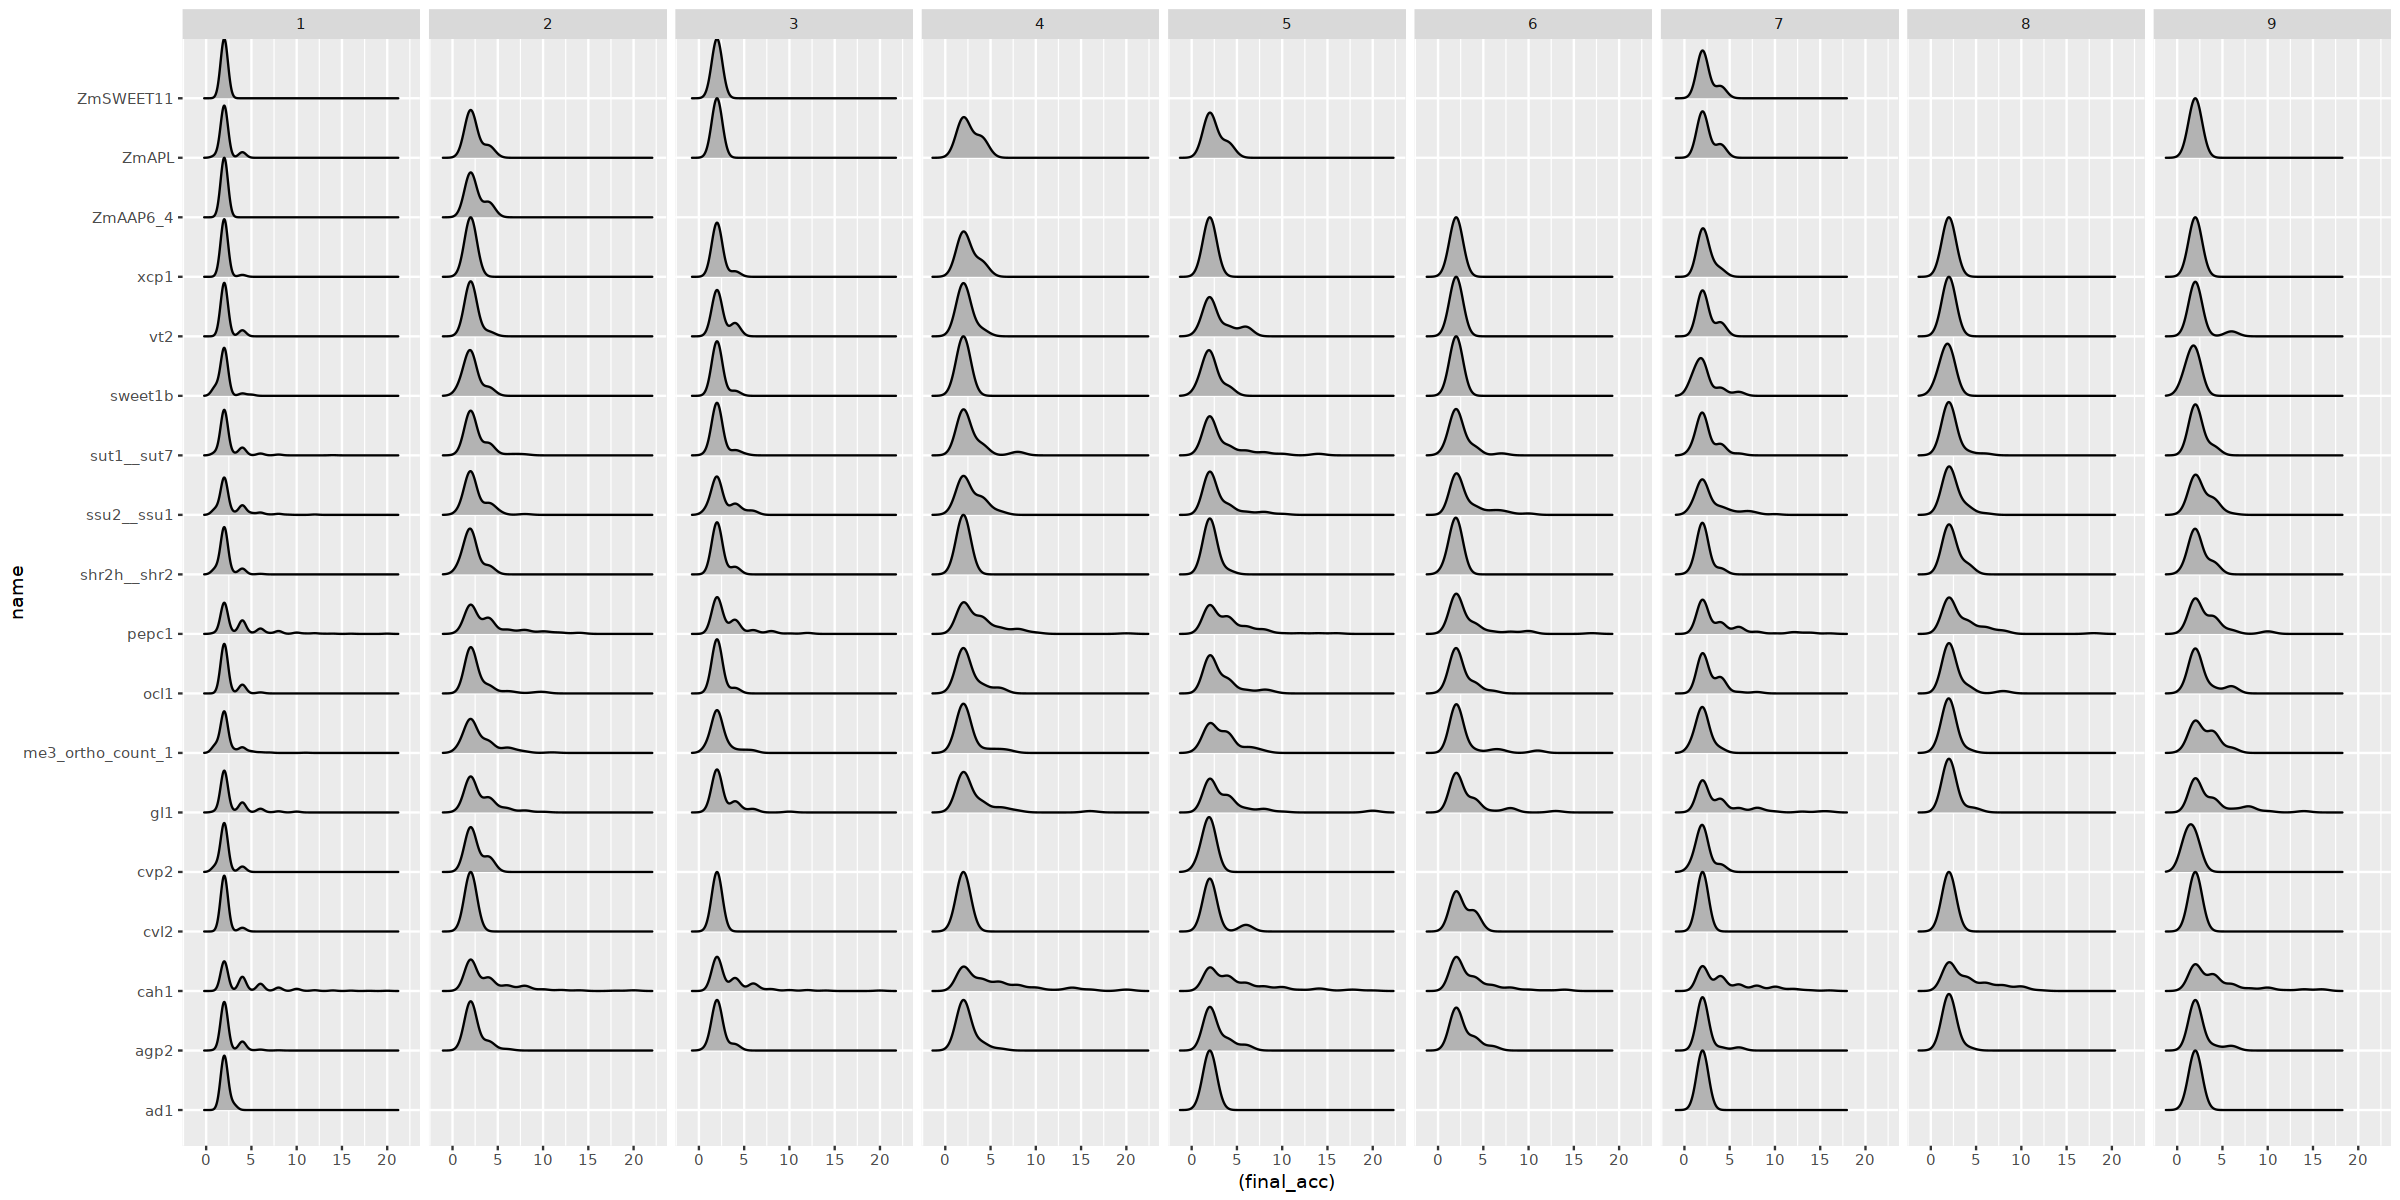

In [38]:
options(repr.plot.width=20, repr.plot.height=10)


library(ggridges)
merged_meta_cpm_information  %>% 
    mutate(final_acc = case_when(accessability > 20 ~ 20,
                                TRUE ~ accessability))  %>% 
    ggplot(., aes(x = (final_acc), y = name))+
    geom_density_ridges(scale = 1) +
    facet_grid(.~LouvainClusters)

In [ ]:
colnames(merged_meta_cpm_information)